In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/data/24_Problemsolver_TP.csv', encoding='cp949')

In [ ]:
data

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,합계 일조시간(hr),평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,0.3,22.9,1.1,2.5,230.0,4.3,270.0,23.0
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,0.2,19.4,1.3,3.9,140.0,6.8,160.0,19.0
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,0.1,17.7,1.9,4.6,90.0,10.1,340.0,19.0
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,0.1,22.3,1.0,3.1,90.0,7.0,20.0,37.0
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,0.0,5.9,1.9,4.6,230.0,7.6,230.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20079,홍천군,2021-04-06,0.0,NaN,1002.9,0.003,0.010,0.4,11.7,3.8,9.6,12.3,1.5,5.2,290.0,9.8,320.0,32.0
20080,홍천군,2021-10-01,6.1,NaN,993.5,0.003,0.019,0.4,19.2,15.4,6.2,21.5,1.0,5.2,250.0,12.3,250.0,18.0
20081,홍천군,2022-12-20,0.0,NaN,1010.3,0.002,0.012,0.6,-7.2,-15.3,5.7,-3.8,0.4,1.3,360.0,2.7,340.0,37.0
20082,홍천군,2023-01-15,11.4,NaN,1000.8,0.002,0.013,0.4,0.3,-1.3,0.0,-0.2,0.5,2.3,200.0,4.5,160.0,8.0


In [ ]:
#data['강수량'] = data['강수량'].fillna(0) #강수량이 Null인 값을 0으로 치환

In [ ]:
data_cleaned = data.dropna() # Nan값 (결측치) 제거

In [ ]:
data.columns

Index(['지역', '일자', '강수량', '평균전운량', '기압', '아황산가스', '이산화질소', '일산화질소', '평균기온',
       '최저기온', '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속',
       '최대순간풍석풍향', '미세먼지 농도'],
      dtype='object')

In [ ]:
data_cleaned #결측치 제거 확인

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,합계 일조시간(hr),평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,0.3,22.9,1.1,2.5,230.0,4.3,270.0,23.0
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,0.2,19.4,1.3,3.9,140.0,6.8,160.0,19.0
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,0.1,17.7,1.9,4.6,90.0,10.1,340.0,19.0
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,0.1,22.3,1.0,3.1,90.0,7.0,20.0,37.0
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,0.0,5.9,1.9,4.6,230.0,7.6,230.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,홍천군,2023-11-30,0.0,0.0,1011.1,0.002,0.014,0.3,-4.6,-7.8,6.1,-2.1,1.4,3.3,290.0,7.8,230.0,29.0
18743,홍천군,2023-12-01,0.0,0.0,1009.3,0.002,0.029,0.4,-5.1,-10.3,6.0,-2.6,0.9,3.8,290.0,6.5,290.0,35.0
18744,홍천군,2023-12-03,0.0,0.0,1009.7,0.003,0.024,0.5,-1.0,-5.5,6.0,-0.7,0.6,3.2,290.0,5.6,290.0,40.0
18745,홍천군,2023-12-04,0.0,0.0,1006.2,0.003,0.023,0.5,-1.4,-7.4,6.0,-1.2,0.3,2.0,320.0,3.5,320.0,57.0


In [ ]:

data_cleaned = data_cleaned[(data_cleaned['미세먼지 농도'] >= 0) & (data_cleaned['미세먼지 농도'] <= 500)]
data_cleaned = data_cleaned[(data_cleaned['이산화질소'] >= 0) & (data_cleaned['이산화질소'] <= 1000)]
data_cleaned = data_cleaned[(data_cleaned['아황산가스'] >= 0) & (data_cleaned['아황산가스'] <= 1000)]
data_cleaned = data_cleaned[(data_cleaned['일산화질소'] >= 0) & (data_cleaned['일산화질소'] <= 1000)]

In [ ]:
# '지역' 값을 숫자로 매핑하기 위한 딕셔너리 생성
region_mapping = {
    '강릉시': 1,
    '동해시': 2,
    '속초시': 3,
    '영월군': 4,
    '원주시': 5,
    '인제군': 6,
    '정선군': 7,
    '철원군': 8,
    '춘천시': 9,
    '태백시': 10,
    '홍천군': 11,
}

# 'adr' 열 생성 및 '지역' 값을 숫자로 변환하여 채우기
data_cleaned['adr'] = data_cleaned['지역'].map(region_mapping)

data_cleaned

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,합계 일조시간(hr),평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도,adr
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,0.3,22.9,1.1,2.5,230.0,4.3,270.0,23.0,1
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,0.2,19.4,1.3,3.9,140.0,6.8,160.0,19.0,1
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,0.1,17.7,1.9,4.6,90.0,10.1,340.0,19.0,1
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,0.1,22.3,1.0,3.1,90.0,7.0,20.0,37.0,1
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,0.0,5.9,1.9,4.6,230.0,7.6,230.0,27.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,홍천군,2023-11-30,0.0,0.0,1011.1,0.002,0.014,0.3,-4.6,-7.8,6.1,-2.1,1.4,3.3,290.0,7.8,230.0,29.0,11
18743,홍천군,2023-12-01,0.0,0.0,1009.3,0.002,0.029,0.4,-5.1,-10.3,6.0,-2.6,0.9,3.8,290.0,6.5,290.0,35.0,11
18744,홍천군,2023-12-03,0.0,0.0,1009.7,0.003,0.024,0.5,-1.0,-5.5,6.0,-0.7,0.6,3.2,290.0,5.6,290.0,40.0,11
18745,홍천군,2023-12-04,0.0,0.0,1006.2,0.003,0.023,0.5,-1.4,-7.4,6.0,-1.2,0.3,2.0,320.0,3.5,320.0,57.0,11


In [ ]:
data_cleaned

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,합계 일조시간(hr),평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도,adr
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,0.3,22.9,1.1,2.5,230.0,4.3,270.0,23.0,1
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,0.2,19.4,1.3,3.9,140.0,6.8,160.0,19.0,1
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,0.1,17.7,1.9,4.6,90.0,10.1,340.0,19.0,1
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,0.1,22.3,1.0,3.1,90.0,7.0,20.0,37.0,1
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,0.0,5.9,1.9,4.6,230.0,7.6,230.0,27.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,홍천군,2023-11-30,0.0,0.0,1011.1,0.002,0.014,0.3,-4.6,-7.8,6.1,-2.1,1.4,3.3,290.0,7.8,230.0,29.0,11
18743,홍천군,2023-12-01,0.0,0.0,1009.3,0.002,0.029,0.4,-5.1,-10.3,6.0,-2.6,0.9,3.8,290.0,6.5,290.0,35.0,11
18744,홍천군,2023-12-03,0.0,0.0,1009.7,0.003,0.024,0.5,-1.0,-5.5,6.0,-0.7,0.6,3.2,290.0,5.6,290.0,40.0,11
18745,홍천군,2023-12-04,0.0,0.0,1006.2,0.003,0.023,0.5,-1.4,-7.4,6.0,-1.2,0.3,2.0,320.0,3.5,320.0,57.0,11


<Axes: title={'center': 'Mutual Information Scores'}>

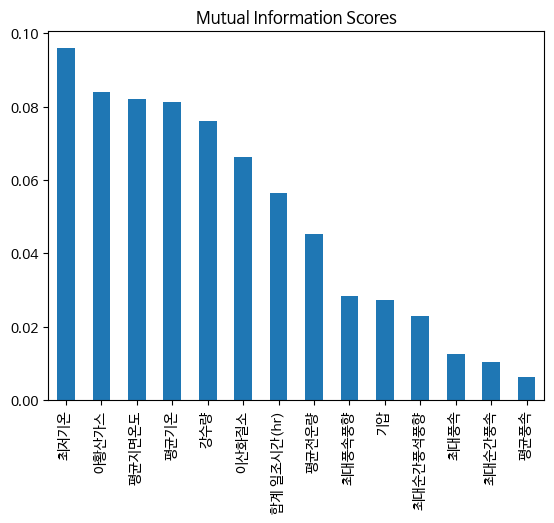

In [ ]:
from sklearn.feature_selection import mutual_info_regression

df=data_cleaned[['강수량', '평균전운량', '기압', '아황산가스', '이산화질소', '평균기온', '최저기온',
       '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속', '최대순간풍석풍향', '미세먼지 농도']]

# MI 계산 (독립변수와 종속변수 간)
X = df.drop('미세먼지 농도', axis=1)
y = df['미세먼지 농도']

mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)

# 상호정보량 시각화
mi_scores.sort_values(ascending=False).plot(kind='bar', title='Mutual Information Scores')


In [ ]:
!pip install minepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp310-cp310-linux_x86_64.whl size=187044 sha256=71ca18af2d5a6d5787536d0ca3e7c426463dbbfb193387bfdda142d031adffff
  Stored in directory: /root/.cache/pip/wheels/69/38/a6/825bb9b9ed81e6af43a0ef80c7cfe4cafcfdbc2f5cde2959d9
Successfully built minepy


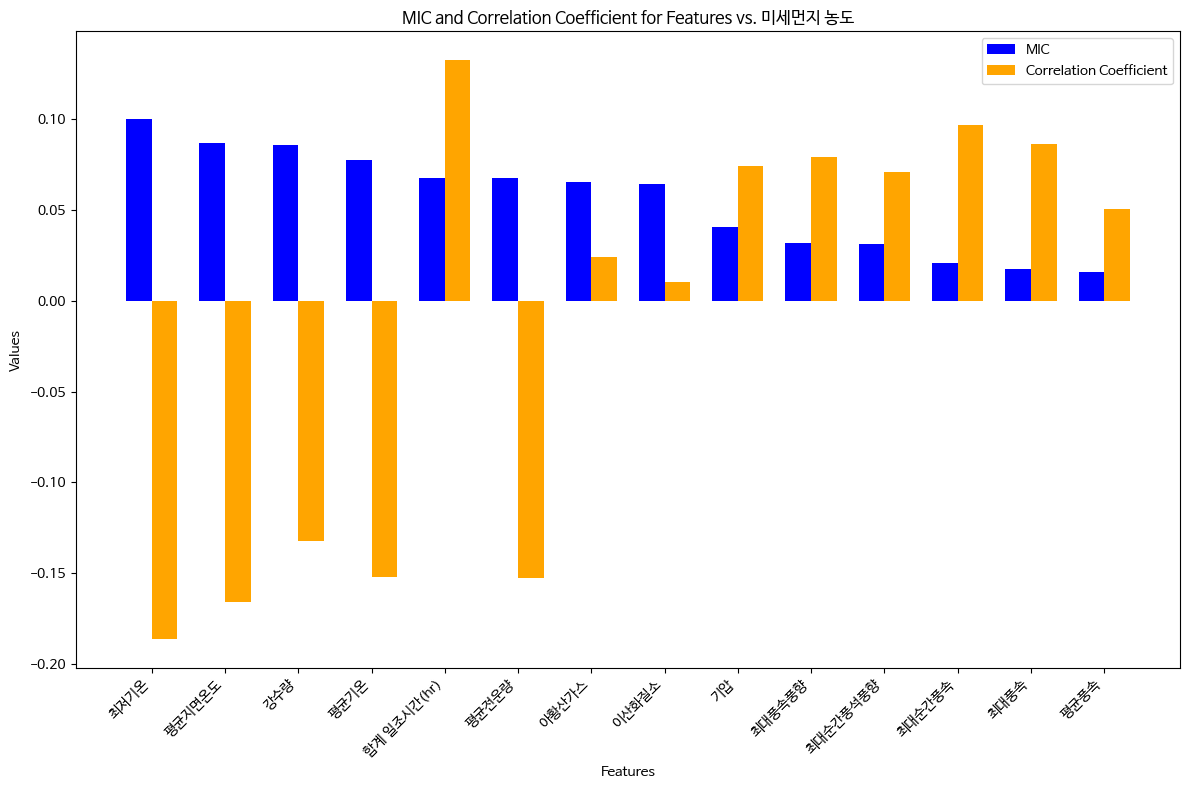

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minepy import MINE
from scipy.stats import pearsonr

# 데이터프레임과 칼럼 정의
columns = ['강수량', '평균전운량', '기압', '아황산가스', '이산화질소', '평균기온', '최저기온',
           '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향',
           '최대순간풍속', '최대순간풍석풍향']

df = data_cleaned

mic_scores = []
correlation_coeffs = []

# MINE 객체 생성
mine = MINE()

# MIC와 상관 계수 계산
for col in columns:
    x = df[col].dropna()  # 결측치 제거
    y = df['미세먼지 농도'].dropna()
    common_index = x.index.intersection(y.index)  # 공통 인덱스 추출
    x, y = x.loc[common_index], y.loc[common_index]

    # Convert x and y to numeric, handling errors
    x = pd.to_numeric(x, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')

    # Drop NaN values introduced by conversion
    common_index = x.index.intersection(y.index)
    x, y = x.loc[common_index].dropna(), y.loc[common_index].dropna()

    # MIC 계산
    mine.compute_score(x, y)
    mic_scores.append(mine.mic())

    # 상관 계수 계산
    corr, _ = pearsonr(x, y)
    correlation_coeffs.append(corr)

# 결과 데이터프레임 생성
results = pd.DataFrame({
    'Feature': columns,
    'MIC': mic_scores,
    'Correlation Coefficient': correlation_coeffs
}).sort_values(by='MIC', ascending=False)

# 그래프 그리기
plt.figure(figsize=(12, 8))
bar_width = 0.35
x = np.arange(len(columns))

# MIC와 상관 계수 바 차트
plt.bar(x - bar_width/2, results['MIC'], width=bar_width, label='MIC', color='blue')
plt.bar(x + bar_width/2, results['Correlation Coefficient'], width=bar_width, label='Correlation Coefficient', color='orange')

# 레이블 추가
plt.xticks(x, results['Feature'], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('MIC and Correlation Coefficient for Features vs. 미세먼지 농도')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 데이터 불러오기 (예: data.csv)
data = data_cleaned

# Assuming df is your DataFrame
X = df.drop('미세먼지 농도', axis=1)
y = df['미세먼지 농도']

# Convert columns in X and y to numeric types, handle errors
# errors='coerce' will replace non-numeric values with NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop rows with NaN values introduced during conversion, but keep at least one row
# This ensures X and y are not empty
X = X.dropna(how='all')  # Drop rows where all values are NaN
y = y[y.index.isin(X.index)]  # Filter y to match X's index
# If X is still empty after dropping rows with all NaN values, keep at least one row
if X.empty:
    X = X.append(pd.Series(dtype='float64'), ignore_index=True) # Add an empty row to avoid errors
    y = y.append(pd.Series(dtype='float64'), ignore_index=True) # Add an empty row to avoid errors



# Filter data in y based on the index of X after dropping NaN values
y = y[y.index.isin(X.index)]

# 상수항 추가 (회귀 분석에 필요)
# Only add constant if X is not empty to avoid errors
if not X.empty:
    X = sm.add_constant(X)

# 선형 회귀 분석
# Only fit the model if both X and y are not empty
if not X.empty and not y.empty:
    model = sm.OLS(y, X).fit()

    # 결과 출력
    print(model.summary())
else:
    print("X or y is empty after data cleaning. Cannot perform regression.")

                            OLS Regression Results                            
Dep. Variable:                미세먼지 농도   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     162.6
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:14:29   Log-Likelihood:                -84181.
No. Observations:               18223   AIC:                         1.684e+05
Df Residuals:                   18208   BIC:                         1.685e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -63.2818      8.819     -7.175      

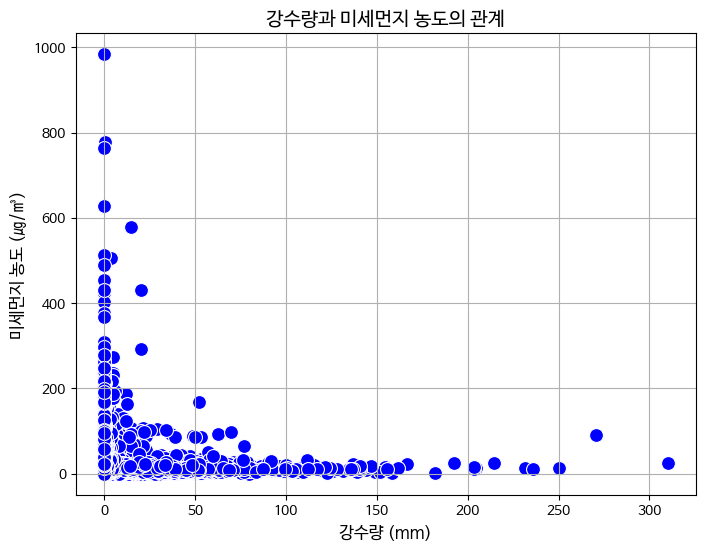

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예제 데이터프레임 생성
df = data_cleaned

# 산점도 그리기 (Seaborn 사용)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='강수량', y='미세먼지 농도', data=df, color='blue', s=100)
plt.title('강수량과 미세먼지 농도의 관계', fontsize=14)
plt.xlabel('강수량 (mm)', fontsize=12)
plt.ylabel('미세먼지 농도 (㎍/㎥)', fontsize=12)
plt.grid(True)
plt.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


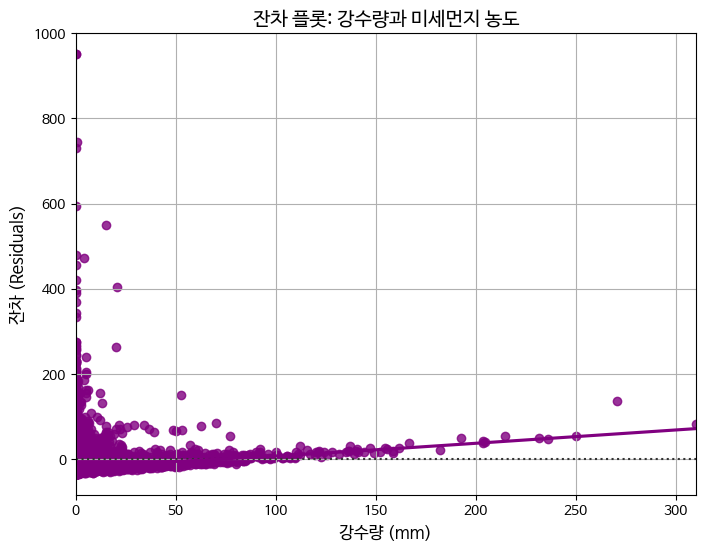

In [ ]:
df = data_cleaned

# 잔차 플롯 그리기
plt.figure(figsize=(8, 6))
sns.residplot(x='강수량', y='미세먼지 농도', data=df, color='purple', lowess=True)
plt.title('잔차 플롯: 강수량과 미세먼지 농도', fontsize=14)
plt.xlabel('강수량 (mm)', fontsize=12)
plt.ylabel('잔차 (Residuals)', fontsize=12)
plt.grid(True)
plt.show()

강수량            float64
기압             float64
아황산가스          float64
이산화질소          float64
평균기온           float64
최저기온           float64
합계 일조시간(hr)    float64
평균지면온도         float64
평균풍속           float64
최대풍속           float64
최대풍속풍향         float64
최대순간풍속         float64
최대순간풍석풍향       float64
미세먼지 농도        float64
dtype: object


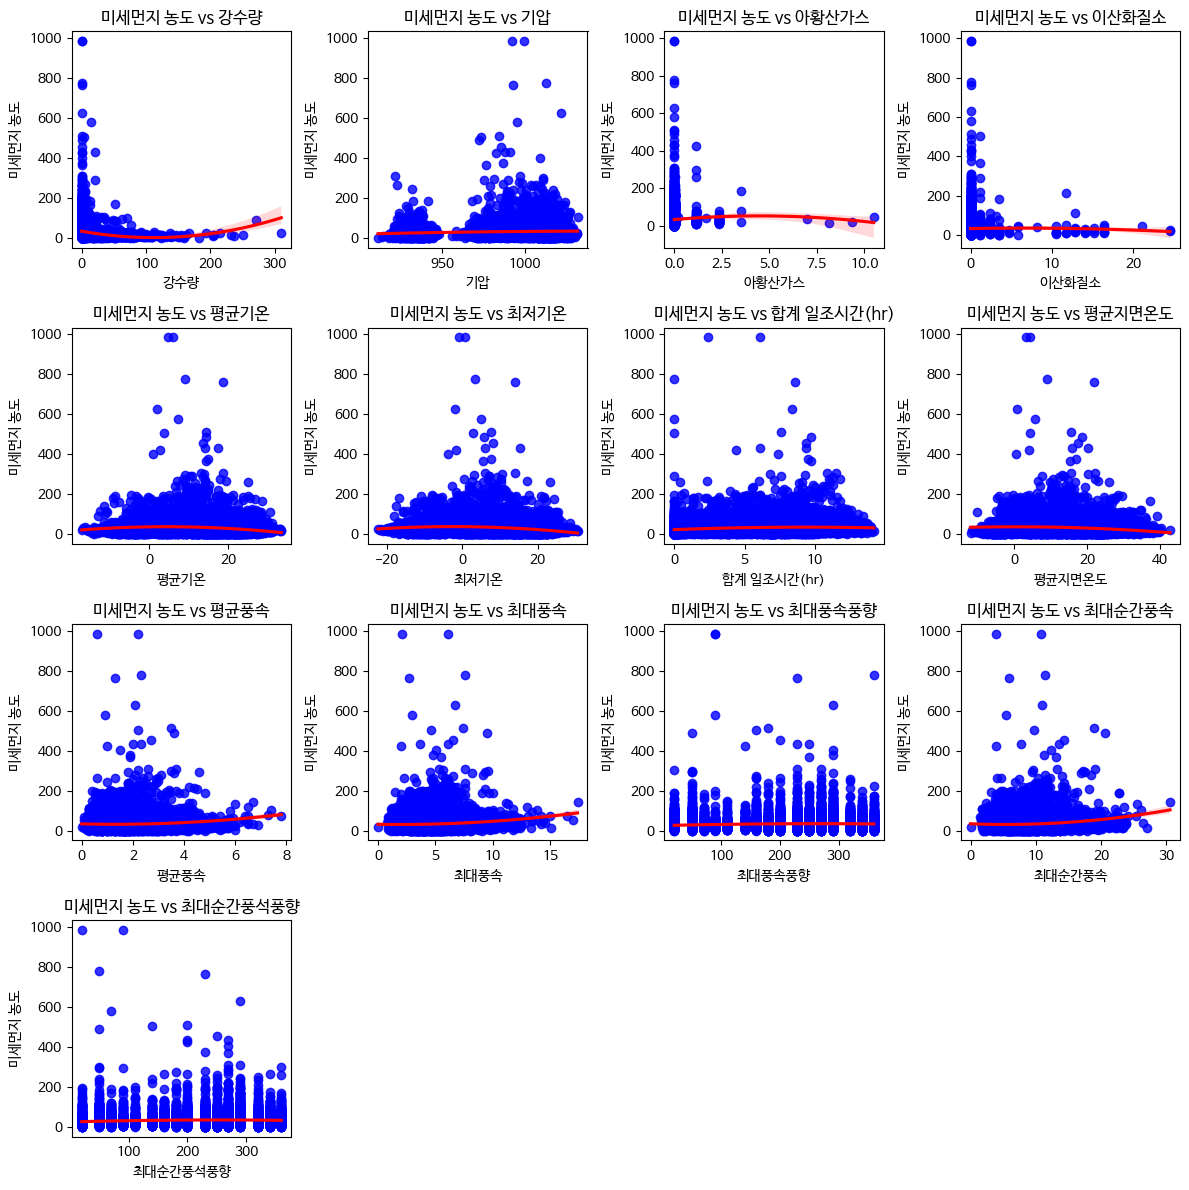

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = data_cleaned[['강수량', '기압', '아황산가스', '이산화질소', '평균기온', '최저기온',
                   '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속', '최대순간풍석풍향','미세먼지 농도']]

# '미세먼지 농도'와 나머지 변수들 간의 산점도를 하나씩 그리기
columns = ['강수량', '기압', '아황산가스', '이산화질소', '평균기온', '최저기온',
           '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향',
           '최대순간풍속', '최대순간풍석풍향']

print(df.dtypes)

# 하나씩 산점도 그리기
plt.figure(figsize=(12, 12))

for i, column in enumerate(columns):
    plt.subplot(4, 4, i+1)  # 4x4 그리드로 배열
    sns.regplot(x=df[column], y=df['미세먼지 농도'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, order=2)
    plt.title(f'미세먼지 농도 vs {column}')
    plt.xlabel(column)
    plt.ylabel('미세먼지 농도')

plt.tight_layout()
plt.show()


스피어먼 행렬:
              미세먼지 농도
강수량         -0.305785
평균전운량       -0.274007
기압           0.111756
아황산가스        0.296473
이산화질소        0.298784
평균기온        -0.264314
최저기온        -0.322845
합계 일조시간(hr)  0.246051
평균지면온도      -0.257667
평균풍속        -0.019849
최대풍속         0.055167
최대풍속풍향       0.127023
최대순간풍속       0.055068
최대순간풍석풍향     0.121995
미세먼지 농도      1.000000


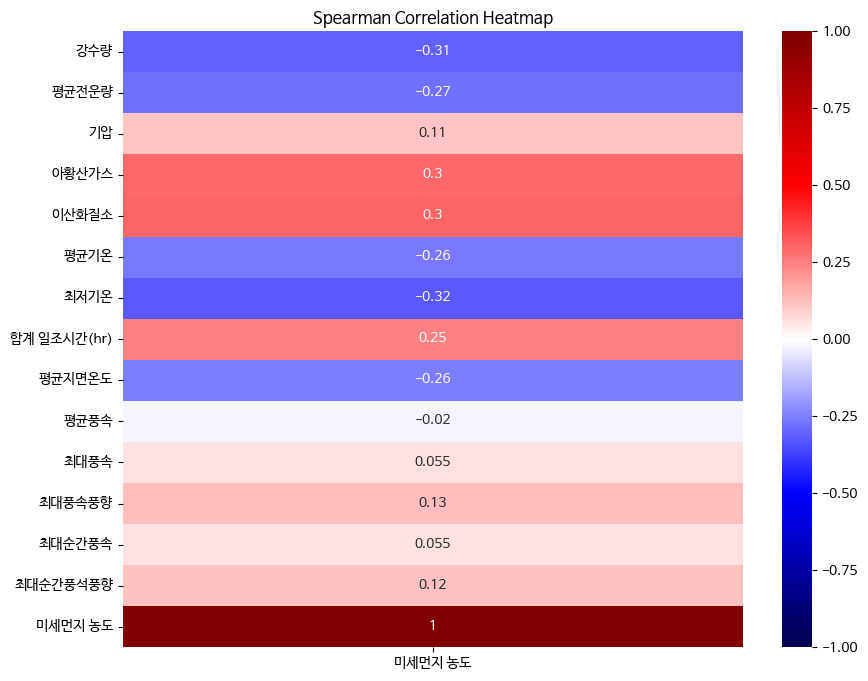

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예제 데이터프레임 생성 (사용자의 데이터를 여기에 입력하세요)
df= data_cleaned[['강수량', '평균전운량', '기압', '아황산가스', '이산화질소', '평균기온', '최저기온',
                   '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속', '최대순간풍석풍향','미세먼지 농도']]

# Calculate the Spearman correlation matrix for all columns, not just '미세먼지 농도'
spearman_corr = df.corr(method='spearman')

# Now you can select '미세먼지 농도' for the heatmap:
spearman_corr_for_heatmap = spearman_corr[['미세먼지 농도']]

print("스피어먼 행렬:")
print(spearman_corr_for_heatmap)

# 스피어만 상관관계히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_for_heatmap, cmap='seismic', annot=True, vmin = -1, vmax = 1)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= data_cleaned[['adr', '강수량', '평균전운량', '기압', '아황산가스', '이산화질소', '일산화질소', '평균기온',
       '최저기온', '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속',
       '최대순간풍석풍향','month', '미세먼지 농도']]

# 스피어만 상관계수를 계산한 상관행렬 구하기
correlation_matrix = df.corr(method='spearman')

# 상관 행렬 시각화 (히트맵)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt='.2f', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix')
plt.tight_layout()
plt.show()

# 상관계수가 높은 변수들 찾아보기 (예: 절대값 0.9 이상인 상관계수)
high_correlation = correlation_matrix.abs() > 0.9
high_correlation = high_correlation.where(high_correlation == True).stack().index.tolist()

# 결과 출력
print("Highly Correlated Features (Spearman correlation > 0.9):")
for pair in high_correlation:
    print(f"{pair[0]} - {pair[1]}")


NameError: name 'data_cleaned' is not defined

In [ ]:
from datetime import datetime
data_cleaned['year'] = data_cleaned['일자'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
data_cleaned['month'] = data_cleaned['일자'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)

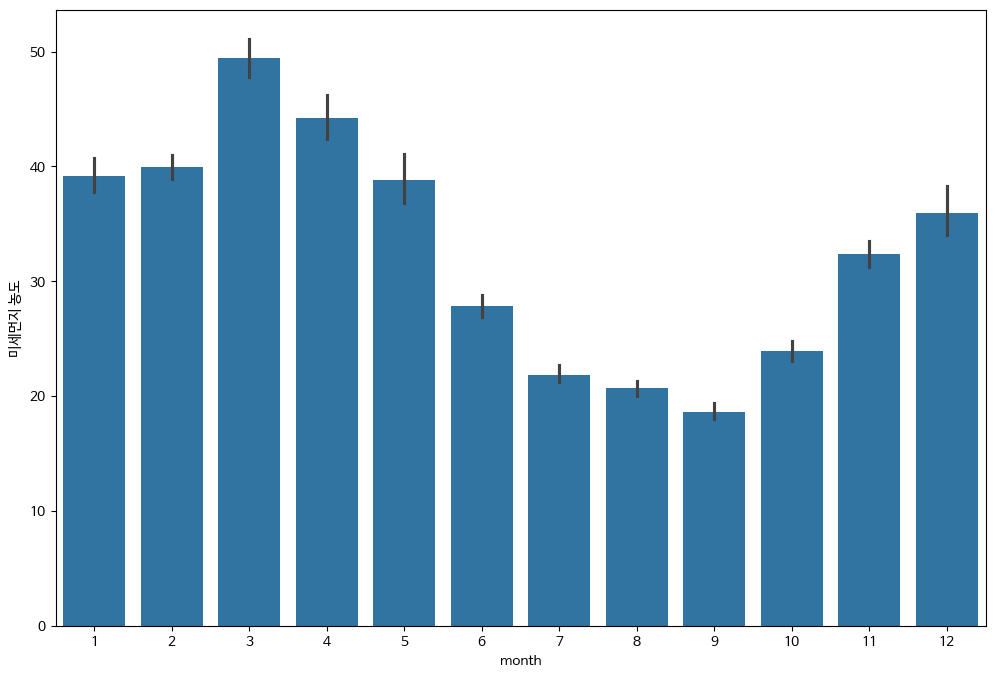

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='미세먼지 농도', data=data_cleaned)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

st_data = data_cleaned[['강수량', '평균전운량', '기압', '아황산가스', '이산화질소', '일산화질소', '평균기온',
       '최저기온', '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속',
       '최대순간풍석풍향', '미세먼지 농도']]

scaler = StandardScaler()
standardized_values = scaler.fit_transform(st_data)

# 결과를 데이터프레임으로 변환
data_cleaned = pd.DataFrame(standardized_values, columns=st_data.columns)

In [ ]:
data_cleaned

,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,합계 일조시간(hr),평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도
0,1.499282,1.689276,0.895703,-0.066822,-0.073545,-0.060735,0.844165,1.147800,-1.548864,0.768239,-0.498504,-0.954168,0.307949,-1.016536,0.628009,-0.358146
1,0.857247,1.689276,1.066008,-0.066822,-0.076490,-0.075066,0.531650,0.712496,-1.575481,0.453104,-0.256089,-0.106987,-0.561174,-0.235147,-0.450742,-0.511829
2,5.653626,1.689276,0.939371,-0.066822,-0.088269,-0.082231,0.430838,0.703033,-1.602099,0.300039,0.471158,0.316603,-1.044020,0.796287,1.314487,-0.511829
3,4.331789,1.689276,0.790900,-0.066822,-0.076490,-0.075066,0.894570,1.157263,-1.602099,0.714216,-0.619712,-0.591091,-1.044020,-0.172636,-1.823697,0.179746
4,-0.268202,1.689276,1.009240,-0.055568,-0.070601,-0.067900,-0.395814,0.002760,-1.628716,-0.762415,0.471158,0.316603,0.307949,0.014898,0.235736,-0.204463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18185,-0.275755,-1.740352,0.755965,-0.061195,-0.073545,-0.075066,-1.706361,-1.445100,-0.005051,-1.482722,-0.134881,-0.470065,0.887364,0.077409,0.235736,-0.127621
18186,-0.275755,-1.740352,0.677363,-0.061195,-0.051460,-0.067900,-1.756767,-1.681679,-0.031669,-1.527741,-0.740920,-0.167500,0.887364,-0.328914,0.824145,0.102904
18187,-0.275755,-1.740352,0.694830,-0.055568,-0.058822,-0.060735,-1.343440,-1.227448,-0.031669,-1.356668,-1.104543,-0.530578,0.887364,-0.610214,0.824145,0.295008
18188,-0.275755,-1.740352,0.541992,-0.055568,-0.060294,-0.060735,-1.383765,-1.407248,-0.031669,-1.401687,-1.468166,-1.256733,1.177072,-1.266581,1.118350,0.948162


In [ ]:
drop_columns = ['기압', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속', '최대순간풍석풍향', '평균지면온도', '평균기온']
new_data = data_cleaned

test = new_data[:13000]
train = new_data[13001:]

y_test = test['미세먼지 농도']
X_test = test.drop(drop_columns, axis = 1)

y_train = train['미세먼지 농도']
X_train = train.drop(drop_columns, axis = 1)

array([[[0.        , 0.35      , 0.20181219, ..., 0.52941176,
         0.19934641, 0.61764706]],

       [[0.        , 0.14      , 0.815486  , ..., 0.47058824,
         0.07189542, 0.94117647]],

       [[0.        , 0.86      , 0.66968699, ..., 0.52941176,
         0.19607843, 0.61764706]],

       ...,

       [[0.        , 0.71      , 0.7553542 , ..., 0.14705882,
         0.21568627, 0.20588235]],

       [[0.62096774, 0.95      , 0.63591433, ..., 0.08823529,
         0.48039216, 0.08823529]],

       [[0.        , 0.13      , 0.69275124, ..., 0.52941176,
         0.19281046, 0.35294118]]])

In [ ]:
y_train = y_train.astype('float')
y_test = y_test.astype('float')

In [ ]:
y_train

,미세먼지 농도
13001,0.832900
13002,-0.511829
13003,0.064483
13004,0.218166
13005,0.679216
...,...
18185,-0.127621
18186,0.102904
18187,0.295008
18188,0.948162


In [ ]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [ ]:
def RMSE(y_true,y_pred):
  return np.sqrt(np.mean((y_true-y_pred)**2))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#랜덤 포레스트를 위한 라이브러리

RF_model = RandomForestRegressor(random_state = 40, n_estimators = 20, max_depth=3) #랜덤 포레스트 정의.
RF_model.fit(X_train, y_train) #학습

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=40)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Import train_test_split

# ... (your existing code for data loading and preprocessing) ...

# Split data into training and testing sets ensuring X_test has data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Ensure X_train and X_test are of type float
X_train = X_train.astype('float')
X_test = X_test.astype('float')

# Define and train the RandomForestRegressor model
RF_model = RandomForestRegressor(random_state=40, n_estimators=20, max_depth=3)
RF_model.fit(X_train, y_train)

# Make predictions
RF_pred_train = RF_model.predict(X_train)
RF_pred_test = RF_model.predict(X_test) # This should now work without error

# ... (rest of your code) ...

NameError: name 'X' is not defined

In [ ]:
RF_pred_train = RF_model.predict(X_train)
RF_pred_test = RF_model.predict(X_test)

In [ ]:
RMSE(np.array(y_train), RF_pred_train)

0.12233211084648765

In [ ]:
RMSE(np.array(y_test), RF_pred_test)

0.1440262398432133

In [ ]:
from sklearn.model_selection import GridSearchCV #그리드 서치 라이브러리
from sklearn import metrics #평가지표 판단에 쓰는 라이브러리

RF_model = RandomForestRegressor()

RMSE_scorer = metrics.make_scorer(RMSE, greater_is_better = False)
#평가함수. RMSE로 평가할거임. 값이 큰 것이 좋은게 아니므로(오차를 나타내므로 작은게 좋다) False

RF_params = {'random_state' : [40], 'n_estimators': list(range(5, 51, 5)), 'max_depth': list(range(2, 6, 1))}
#랜덤성 고정시키고 샘플링을 5~50 5단위로(즉, 5, 10, 15, ..), 최대 깊이를 2~5 1단위로 (즉, 2, 3, 4, 5)

In [ ]:
GS_RF_model = GridSearchCV(estimator = RF_model,
                           param_grid = RF_params,
                           scoring = RMSE_scorer,
                           cv = 5)

In [ ]:
GS_RF_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50],
                         'random_state': [40]},
             scoring=make_scorer(RMSE, greater_is_better=False, response_method='predict'))

In [ ]:
GS_RF_model.best_params_

{'max_depth': 5, 'n_estimators': 10, 'random_state': 40}

In [ ]:
GS_RF_pred_test = GS_RF_model.best_estimator_.predict(X_test)
GS_RF_pred_train = GS_RF_model.best_estimator_.predict(X_train)

In [ ]:
RMSE(np.array(y_train), GS_RF_pred_train)

0.04091568001516058

In [ ]:
RMSE(np.array(y_test), GS_RF_pred_test)

0.03991753176464272

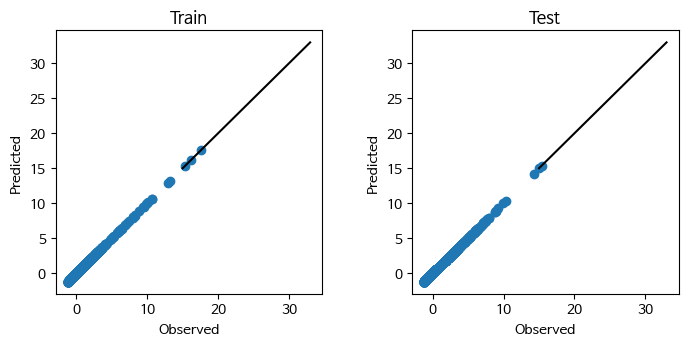

In [ ]:
fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

x = np.linspace(15,33)
y=x
# y=x 그래프를 그림. 0~1000까지

axs[0].plot(y_train, y_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, y_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

In [ ]:
#======================================================================================= LSTM

In [ ]:
data_cleaned

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# 데이터 준비
# 선택한 독립변수들만 선택
df = data_cleaned[['강수량', '평균전운량', '아황산가스', '이산화질소', '일산화질소', '최저기온', '합계 일조시간(hr)']]

# 종속변수 '미세먼지 농도'를 따로 저장
y = data_cleaned['미세먼지 농도']

# 데이터 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 시퀀스 데이터 생성
def create_sequences(data, target, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # 시퀀스 길이
X, y = create_sequences(scaled_data, y.values, seq_length)

# 학습 데이터와 테스트 데이터 분리
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# 예측
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 결과 평가
train_rmse = np.sqrt(np.mean((y_train - y_pred_train.flatten())**2))
test_rmse = np.sqrt(np.mean((y_test - y_pred_test.flatten())**2))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 1323.4602 - val_loss: 1138.3318
Epoch 2/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 752.9240 - val_loss: 1018.8812
Epoch 3/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - loss: 826.0516 - val_loss: 1003.8279
Epoch 4/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 766.0548 - val_loss: 996.8190
Epoch 5/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 931.5052 - val_loss: 1025.8367
Epoch 6/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - loss: 873.3425 - val_loss: 973.4833
Epoch 7/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - loss: 785.6388 - val_loss: 965.6890
Epoch 8/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - loss: 1033.2223 - val_loss: 957.7134
Epoch 9/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - loss: 973.4236 - val_loss: 957.0629
Epoch 10/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - loss: 725.3956 - val_loss: 957.8693
Epoch 11/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - loss: 673.7603 -

In [ ]:
scaled_data

array([[7.58064516e-02, 1.00000000e+00, 9.51655881e-05, ...,
        9.64506173e-04, 7.92452830e-01, 2.11267606e-02],
       [4.83870968e-02, 1.00000000e+00, 9.51655881e-05, ...,
        5.78703704e-04, 7.05660377e-01, 1.40845070e-02],
       [2.53225806e-01, 1.00000000e+00, 9.51655881e-05, ...,
        3.85802469e-04, 7.03773585e-01, 7.04225352e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.85496764e-04, ...,
        9.64506173e-04, 3.18867925e-01, 4.22535211e-01],
       [0.00000000e+00, 0.00000000e+00, 2.85496764e-04, ...,
        9.64506173e-04, 2.83018868e-01, 4.22535211e-01],
       [0.00000000e+00, 0.00000000e+00, 2.85496764e-04, ...,
        5.78703704e-04, 1.37735849e-01, 4.08450704e-01]])

In [ ]:
data_cleaned

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,합계 일조시간(hr),평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도,year,month
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,0.3,22.9,1.1,2.5,230.0,4.3,270.0,23.0,2019,9
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,0.2,19.4,1.3,3.9,140.0,6.8,160.0,19.0,2019,9
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,0.1,17.7,1.9,4.6,90.0,10.1,340.0,19.0,2019,9
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,0.1,22.3,1.0,3.1,90.0,7.0,20.0,37.0,2019,10
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,0.0,5.9,1.9,4.6,230.0,7.6,230.0,27.0,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,홍천군,2023-11-30,0.0,0.0,1011.1,0.002,0.014,0.3,-4.6,-7.8,6.1,-2.1,1.4,3.3,290.0,7.8,230.0,29.0,2023,11
18743,홍천군,2023-12-01,0.0,0.0,1009.3,0.002,0.029,0.4,-5.1,-10.3,6.0,-2.6,0.9,3.8,290.0,6.5,290.0,35.0,2023,12
18744,홍천군,2023-12-03,0.0,0.0,1009.7,0.003,0.024,0.5,-1.0,-5.5,6.0,-0.7,0.6,3.2,290.0,5.6,290.0,40.0,2023,12
18745,홍천군,2023-12-04,0.0,0.0,1006.2,0.003,0.023,0.5,-1.4,-7.4,6.0,-1.2,0.3,2.0,320.0,3.5,320.0,57.0,2023,12


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# 데이터 준비
# 선택한 독립변수들만 선택
df = data_cleaned[['강수량', '평균전운량', '아황산가스', '이산화질소', '일산화질소', '최저기온', '합계 일조시간(hr)']]

# 종속변수 '미세먼지 농도'를 따로 저장
y = data_cleaned['미세먼지 농도']

# 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 시퀀스 데이터 생성
def create_sequences(data, target, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # 시퀀스 길이
X, y = create_sequences(scaled_data, y.values, seq_length)

# 학습 데이터와 테스트 데이터 분리
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# 예측
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 결과 평가
train_rmse = np.sqrt(np.mean((y_train - y_pred_train.flatten())**2))
test_rmse = np.sqrt(np.mean((y_test - y_pred_test.flatten())**2))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 1188.8632 - val_loss: 1136.8160
Epoch 2/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - loss: 980.1809 - val_loss: 1018.5841
Epoch 3/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - loss: 759.2618 - val_loss: 999.7900
Epoch 4/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - loss: 922.6835 - val_loss: 999.1854
Epoch 5/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 878.3033 - val_loss: 1000.4768
Epoch 6/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - loss: 767.2214 - val_loss: 995.0754
Epoch 7/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - loss: 1133.7264 - val_loss: 1001.4490
Epoch 8/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - loss: 961.9854 - val_loss: 998.5989
Epoch 9/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - loss: 805.3715 - val_loss: 997.8223
Epoch 10/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - loss: 900.7988 - val_loss: 1000.9539
Epoch 11/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 807.3040 

In [ ]:
seq_length = 1

# 새로운 데이터 전처리
new_data = np.array([[0, 12, 0.002, 0.018, 0.4, -1.6, 2.9]]) #11월 20일 춘천시 중앙로의 요소
#-------(강수량, 평균전운량, 아황산가스, 이산화질소, 일산화질소, 최저기온, 합계 일조시간(hr))
new_data_scaled = scaler.transform(new_data)
new_data_scaled = new_data_scaled.reshape((1, seq_length, new_data_scaled.shape[1]))

# 예측
new_pred = model.predict(new_data_scaled)

# 예측 결과를 7개의 특징을 가진 형태로 변환
new_pred_expanded = np.zeros((new_pred.shape[0], 7))
new_pred_expanded[:, 0] = new_pred[:, 0]

# 역변환
new_pred_original_scale = scaler.inverse_transform(new_pred_expanded)

# 필요한 값만 출력
print(f'Predicted 미세먼지 농도: {new_pred_original_scale[0][0]}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Predicted 미세먼지 농도: 15.265218435119811


<ipython-input-20-3a6f6f6e94ab>:21: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  plt.tight_layout()
<ipython-input-20-3a6f6f6e94ab>:21: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  plt.tight_layout()
<ipython-input-20-3a6f6f6e94ab>:21: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  plt.tight_layout()
<ipython-input-20-3a6f6f6e94ab>:21: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-20-3a6f6f6e94ab>:21: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from current font.
  plt.tight_layout()
<ipython-input-20-3a6f6f6e94ab>:21: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-20-3a6f6f6e94ab>:21: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
<ipython-input-20-3a6f6f6e94ab>:21: UserWarning: Glyph 51

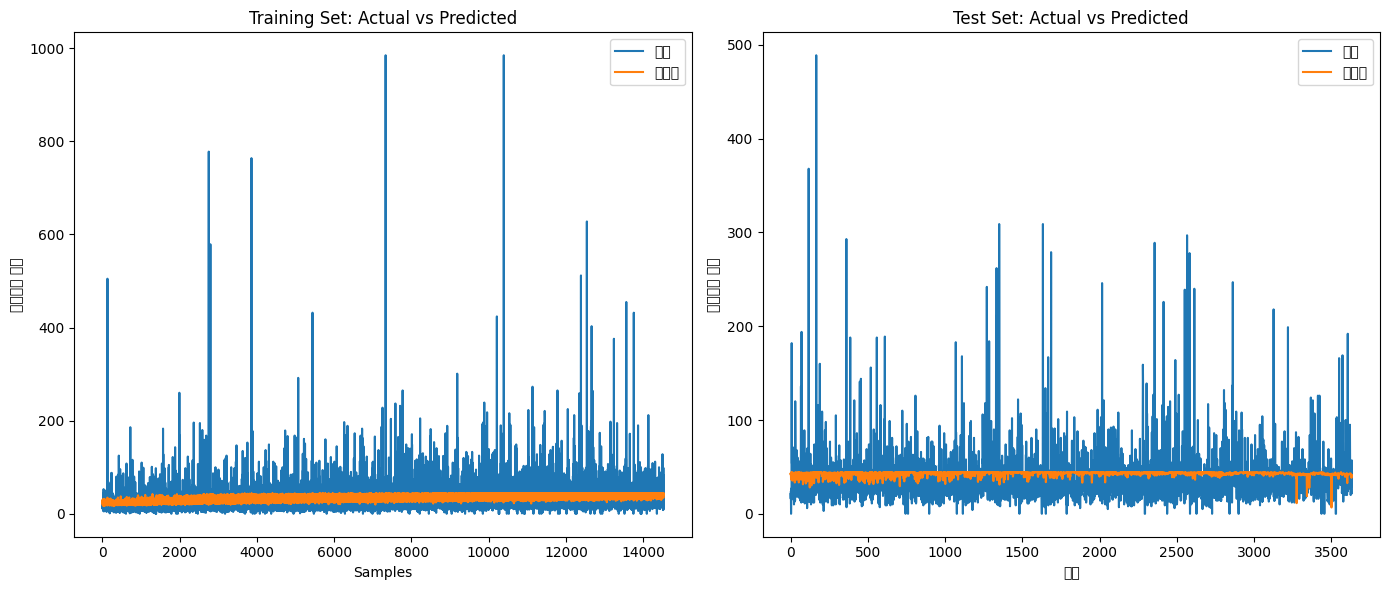

In [ ]:

# Plotting the actual vs predicted values for the training set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(y_train, label='실제')
plt.plot(y_pred_train.flatten(), label='예측값')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('미세먼지 농도')
plt.legend()

# Plotting the actual vs predicted values for the test set
plt.subplot(1, 2, 2)
plt.plot(y_test, label='실제')
plt.plot(y_pred_test.flatten(), label='예측값')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('예측')
plt.ylabel('미세먼지 농도')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#=======================================================================================
#=======================================================================================

In [ ]:
import pandas as pd

# 예제 데이터프레임 생성 (사용자 데이터를 여기에 대입해야 합니다)
# 데이터는 무작위로 예시를 든 것입니다.

df = data_cleaned[['강수량','평균전운량', '기압', '아황산가스', '이산화질소', '평균기온', '최저기온',
                   '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속', '최대순간풍석풍향','미세먼지 농도']]

# 상관행렬 계산
correlation_matrix = df.corr(method='pearson')['미세먼지 농도']

# 피어슨 상관행렬 출력
print("피어슨 상관 행렬:")
print(correlation_matrix)


피어슨 상관 행렬:
평균전운량         -0.180604
기압             0.083178
아황산가스          0.028260
이산화질소          0.011827
평균기온          -0.170307
최저기온          -0.209914
합계 일조시간(hr)    0.158142
평균지면온도        -0.184381
평균풍속           0.054084
최대풍속           0.093439
최대풍속풍향         0.092927
최대순간풍속         0.105715
최대순간풍석풍향       0.090900
미세먼지 농도        1.000000
Name: 미세먼지 농도, dtype: float64


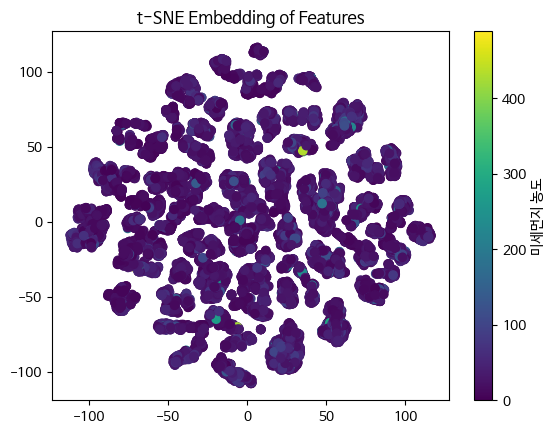

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Embedding of Features')
plt.colorbar(label='미세먼지 농도')
plt.show()

In [ ]:
#############################3

<Axes: >

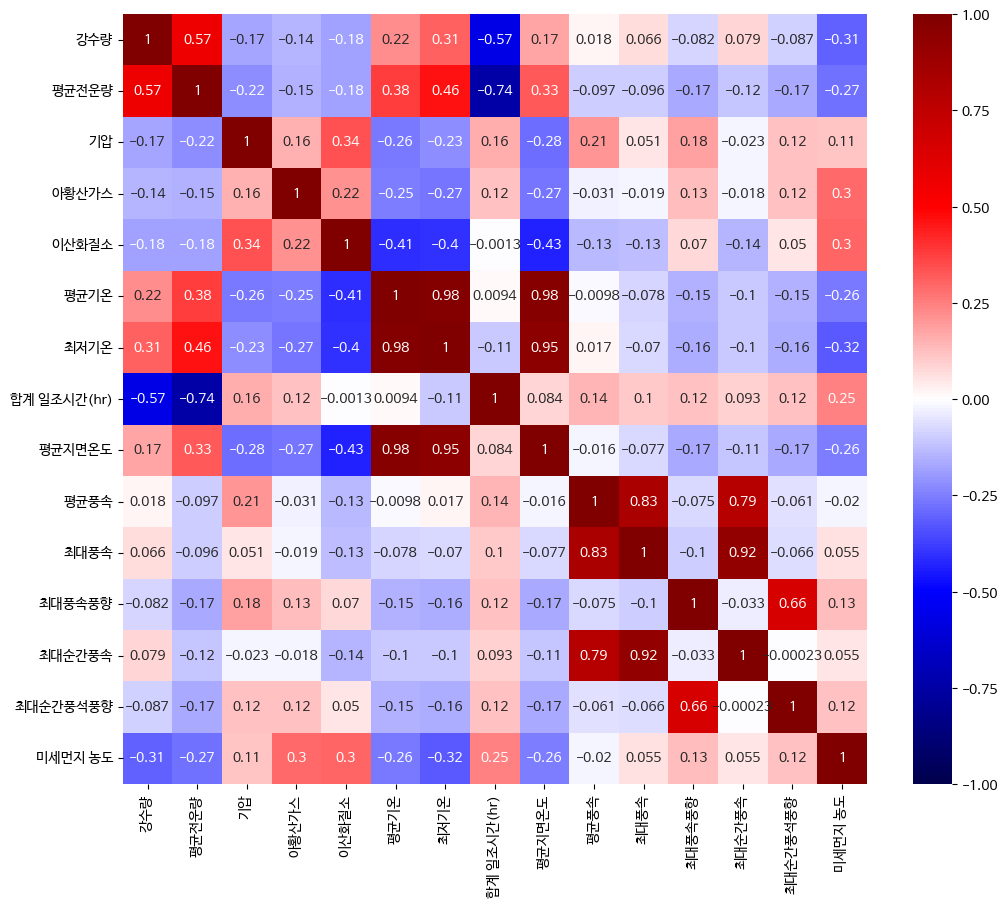

In [ ]:
corrMat = data_cleaned[['강수량', '평균전운량', '기압', '아황산가스', '이산화질소', '평균기온', '최저기온',
       '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속', '최대순간풍석풍향', '미세먼지 농도']].corr(method='spearman') # 상관계수 계산

plt.figure(figsize=(12,10))
sns.heatmap(corrMat, cmap='seismic', annot=True, vmin = -1, vmax = 1)
#sns.heatmap(corrMat, cmap='bwr', annot=True) # 상관관계 히트맵 시각화

In [ ]:
from sklearn.preprocessing import StandardScaler

st_data = data_cleaned[['강수량', '평균전운량', '기압', '아황산가스', '이산화질소', '일산화질소', '평균기온',
       '최저기온', '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속',
       '최대순간풍석풍향', '미세먼지 농도']]

scaler = StandardScaler()
standardized_values = scaler.fit_transform(st_data)

# 결과를 데이터프레임으로 변환
st_data = pd.DataFrame(standardized_values, columns=st_data.columns)

KeyError: "['일산화질소'] not in index"

In [ ]:
st_data

,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,합계 일조시간(hr),평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도
0,-0.285107,-0.523643,1.196456,-0.042633,-0.064482,-0.039962,-1.387996,-1.286825,0.120009,-1.520779,0.353024,1.334160,0.788835,1.188595,0.703588,-0.536242
1,-0.285107,-1.677769,1.225671,-0.042633,-0.061298,-0.039962,-1.377890,-1.334881,0.692799,-1.485114,-0.343505,-0.300668,0.788835,-0.171846,0.703588,-0.495145
2,-0.285107,-1.677769,1.281181,-0.031542,-0.064482,-0.028379,-1.276826,-1.123434,0.692799,-1.395952,0.074413,-0.368786,0.788835,-0.238209,0.703588,-0.412950
3,-0.285107,0.019475,1.126338,-0.028769,-0.051745,-0.028379,-0.973636,-1.027322,-0.504854,-1.181962,1.188858,1.402278,0.207281,1.022687,0.100896,5.463957
4,-0.285107,-1.270430,1.064986,-0.037087,-0.061298,-0.034170,-1.155550,-1.046544,0.666763,-1.262208,1.049553,0.108039,0.594984,0.889961,0.502690,2.135079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834,-0.285107,-1.406210,-1.316088,-0.048178,-0.026272,-0.031275,-1.580017,-1.623218,0.172081,-1.556443,-1.179339,-0.845611,0.207281,-1.001383,0.100896,0.080217
5835,-0.285107,-1.575934,-1.359912,-0.048178,-0.029456,-0.034170,-1.418315,-1.344492,0.172081,-1.529695,-0.622116,-0.709375,1.273464,-0.271390,1.205831,0.696676
5836,-0.285107,-1.406210,-1.546892,-0.045405,-0.019904,-0.031275,-1.519379,-1.603995,0.172081,-1.618857,-1.040033,-0.845611,-0.083497,-1.100927,-0.401347,0.532287
5837,0.135886,0.324979,-1.579029,-0.042633,-0.016720,-0.025483,-1.387996,-1.382937,-1.364039,-1.485114,-1.040033,-0.709375,-0.083497,-0.868657,-0.200450,0.162411


<Axes: >

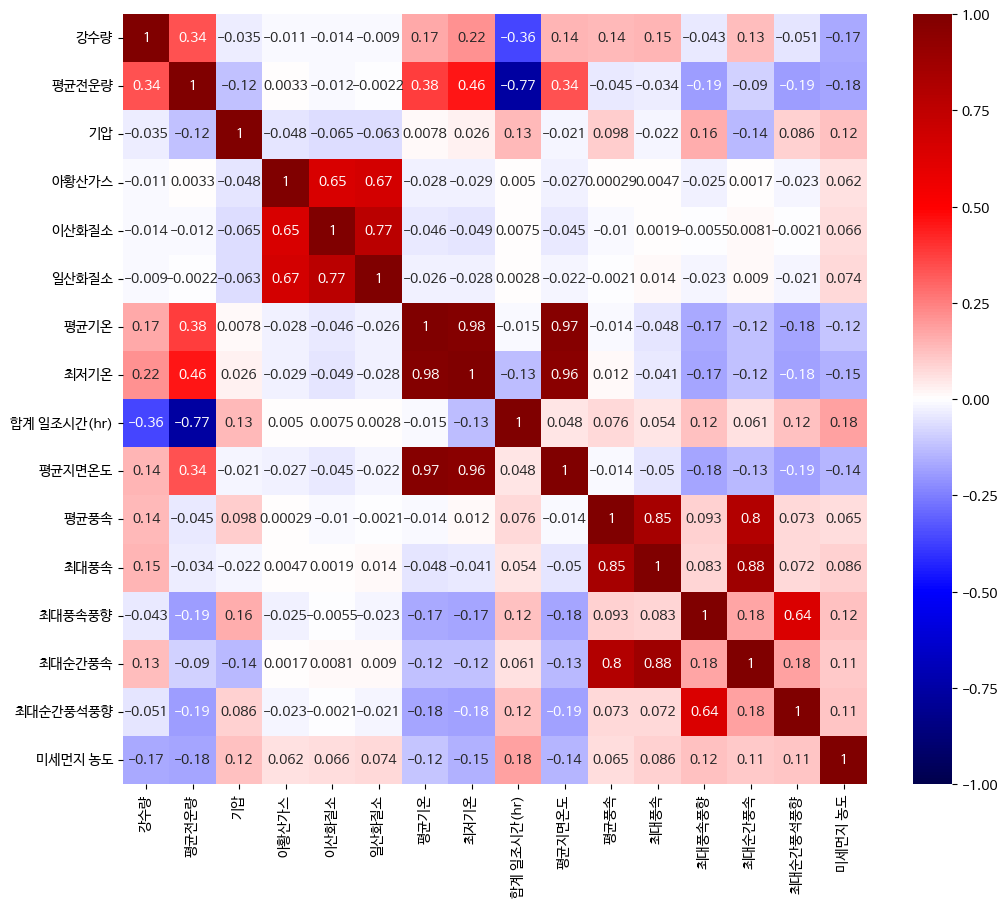

In [ ]:
corrMat = st_data[['강수량', '평균전운량', '기압', '아황산가스', '이산화질소', '일산화질소', '평균기온',
       '최저기온', '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속',
       '최대순간풍석풍향', '미세먼지 농도']].corr() # 상관계수 계산

plt.figure(figsize=(12,10))
sns.heatmap(corrMat, cmap='seismic', annot=True, vmin = -1, vmax = 1)
#sns.heatmap(corrMat, cmap='bwr', annot=True) # 상관관계 히트맵 시각화